In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
data = pd.read_csv('winequality-red.csv')
x = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


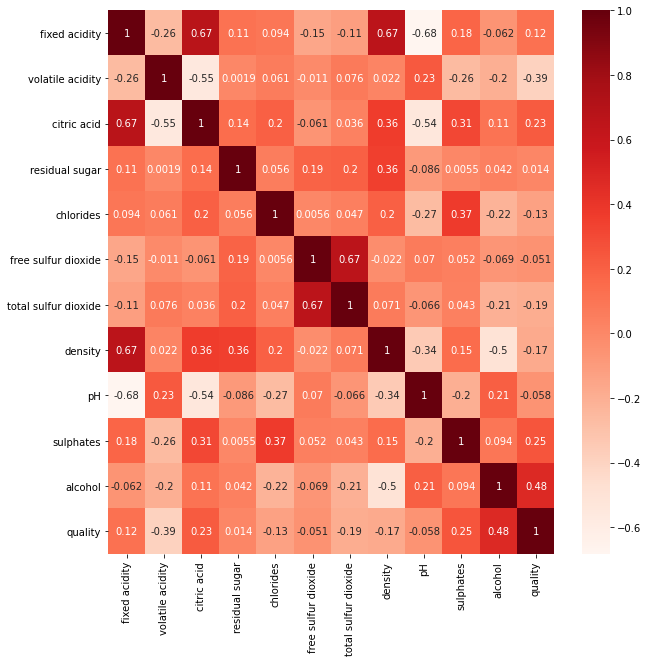

In [3]:
corrmat = data.corr(method='pearson')
plt.figure(figsize=(10,10))
sn.heatmap(corrmat,annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
data['quality'] = [1 if x < 6 else x  for x in data['quality']]
data['quality'] = [2 if x == 6 else x  for x in data['quality']]
data['quality'] = [3 if x >= 7 else x for x in data['quality']]

x = x[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]
y = data['quality']

In [0]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [0]:
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [7]:
model = Sequential()
sgd = SGD(lr=0.01)
adam = Adam(lr=0.01)
model.add(Dense(16, input_shape=(8,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

fit = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))

Train on 1279 samples, validate on 320 samples
Epoch 1/1000
1279/1279 [==============================] - 0s 113us/step - loss: 0.1993 - accuracy: 0.4762 - val_loss: 0.1740 - val_accuracy: 0.5375
Epoch 2/1000
1279/1279 [==============================] - 0s 40us/step - loss: 0.1703 - accuracy: 0.5465 - val_loss: 0.1681 - val_accuracy: 0.5281
Epoch 3/1000
1279/1279 [==============================] - 0s 41us/step - loss: 0.1664 - accuracy: 0.5418 - val_loss: 0.1651 - val_accuracy: 0.5188
Epoch 4/1000
1279/1279 [==============================] - 0s 37us/step - loss: 0.1637 - accuracy: 0.5434 - val_loss: 0.1627 - val_accuracy: 0.5250
Epoch 5/1000
1279/1279 [==============================] - 0s 40us/step - loss: 0.1615 - accuracy: 0.5489 - val_loss: 0.1607 - val_accuracy: 0.5250
Epoch 6/1000
1279/1279 [==============================] - 0s 38us/step - loss: 0.1595 - accuracy: 0.5512 - val_loss: 0.1588 - val_accuracy: 0.5344
Epoch 7/1000
1279/1279 [==============================] - 0s 38us/step

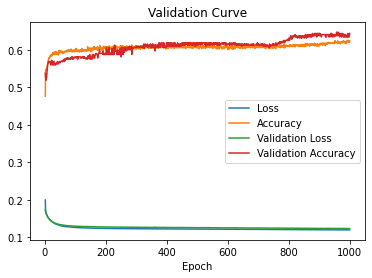

In [8]:
epoch = np.arange(1,1001)

plt.plot(epoch, fit.history['loss'], label='Loss')
plt.plot(epoch, fit.history['accuracy'], label='Accuracy')
plt.title('Validation Curve')

plt.plot(epoch, fit.history['val_loss'], label='Validation Loss')

plt.plot(epoch, fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='right')